# Amplificador Lock-in

Guilherme de Oliveira Monteiro Peixoto

In [1]:
import numpy as np
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from scipy import stats
from scipy.stats.mstats import gmean
from sklearn.metrics import mean_absolute_error

In [2]:
Vref_f = float(input('\nFrequencia: '))
Vin_f = Vref_f
Vin_B = float(input('\nAmplitude do Sinal de Entrada: '))
Vin_w = 2*np.pi*Vin_f
Vin_theta = float(input('\nFase do Sinal de Entrada: '))
Vref_A = 1
Vref_w = 2*np.pi*Vref_f
pontos = 20000


Frequencia: 60

Amplitude do Sinal de Entrada: 2.5

Fase do Sinal de Entrada: 30


In [3]:
array_seno_ref = np.array([Vref_A*(np.sin(Vref_f*2*np.pi*a/pontos)) for a in range(pontos)])
array_seno_ref90 = np.array([Vref_A*(np.cos(Vref_f*2*np.pi*a/pontos)) for a in range(pontos)])
array_seno_in = np.array([Vin_B*np.sin(Vin_w*a/pontos+Vin_theta*np.pi/180)+ (1 * np.random.random() - 1) for a in range(pontos)])
array_seno_in2 = np.array([Vin_B*np.sin(Vin_w*a/pontos+Vin_theta*np.pi/180) for a in range(pontos)])

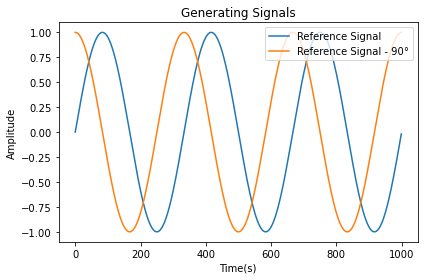

In [5]:
plt.title('Generating Signals')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.plot(array_seno_ref[0:1000],label="Reference Signal")
plt.plot(array_seno_ref90[0:1000],label="Reference Signal - 90°")
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

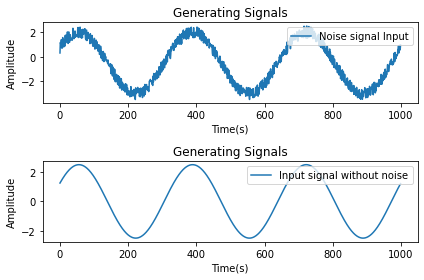

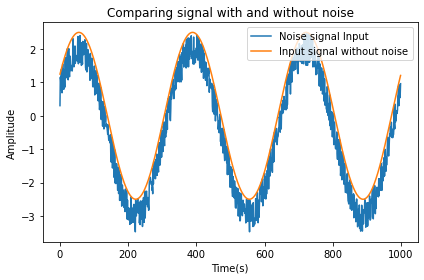

In [7]:
plt.subplot(2,1,1)
plt.title('Generating Signals')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.plot(array_seno_in[0:1000],label="Noise signal Input")
plt.legend(loc='upper right')
plt.subplot(2,1,2)
plt.title('Generating Signals')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.plot(array_seno_in2[0:1000],label="Input signal without noise")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
plt.plot(array_seno_in[0:1000],label="Noise signal Input")
plt.plot(array_seno_in2[0:1000],label="Input signal without noise")
plt.title('Comparing signal with and without noise')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

In [8]:
def lowpass(x, alpha):
    data = [x[0]]
    for a in x[1:]:
        data.append(data[-1] + (alpha*(a-data[-1])))
    return np.array(data)
frequencia_corte = 0.001
multiplicacao = np.multiply(array_seno_ref,array_seno_in)
passa_baixo = np.abs(lowpass(np.array(multiplicacao), frequencia_corte))

multiplicacao2 = np.multiply(array_seno_ref90,array_seno_in)
passa_baixo2 = np.abs(lowpass(np.array(multiplicacao2), frequencia_corte))

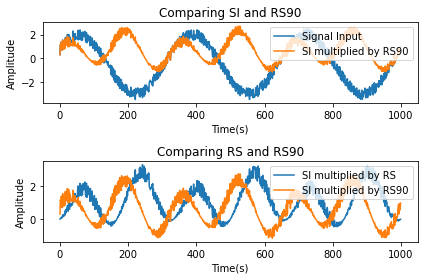

In [9]:
plt.subplot(2,1,1)
plt.plot(array_seno_in[0:1000],label="Signal Input") #
plt.plot(multiplicacao2[0:1000],label="SI multiplied by RS90") #
plt.title('Comparing SI and RS90') #
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.subplot(2,1,2)
plt.plot(multiplicacao[0:1000],label="SI multiplied by RS") #
plt.plot(multiplicacao2[0:1000],label="SI multiplied by RS90") #
plt.title('Comparing RS and RS90')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

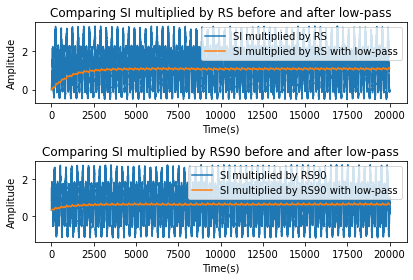

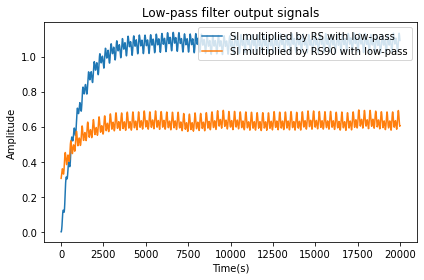

In [10]:
plt.subplot(2,1,1)
plt.plot(multiplicacao,label="SI multiplied by RS")
plt.plot(passa_baixo,label="SI multiplied by RS with low-pass")
plt.title('Comparing SI multiplied by RS before and after low-pass')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.subplot(2,1,2)
plt.plot(multiplicacao2,label="SI multiplied by RS90")
plt.plot(passa_baixo2,label="SI multiplied by RS90 with low-pass")
plt.title('Comparing SI multiplied by RS90 before and after low-pass')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
plt.plot(passa_baixo,label="SI multiplied by RS with low-pass")
plt.plot(passa_baixo2,label="SI multiplied by RS90 with low-pass")
plt.title('Low-pass filter output signals')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [11]:
MAG = 2*np.sqrt((np.square(passa_baixo2)+ np.square(passa_baixo)))
FASE = np.arctan(np.divide(np.array(passa_baixo2[3:], dtype=float), np.array(passa_baixo[3:], dtype=float)))*180/np.pi

media_fase = np.mean(FASE[5000:])
media_mag = np.mean(MAG[5000:])
print('\nMedia Amplitude: ',media_mag, '\nMedia Fase: ',media_fase)


Media Amplitude:  2.4931739102032084 
Media Fase:  30.124854102939455


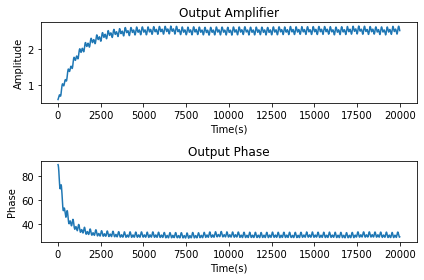

In [14]:
plt.subplot(2,1,1)
plt.plot(MAG)
plt.title('Output Amplifier')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.subplot(2,1,2)
plt.plot(FASE)
plt.title('Output Phase')
plt.xlabel('Time(s)')
plt.ylabel('Phase')
plt.tight_layout()
plt.show()